In [482]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [483]:
def condition_2D(miu_2D, cov_2D, x=None, y=None):
    """
    Returns a 1D normal distribution, the result of conditioning a 2D normal.
    Params:
        miu_2D - the mean of the 2D distribution
        cov_2D - the covariance matrix of the 2D distribution
        x      - the known x value
        y      - the known y value
    """
    if x is None and y is None:
        raise Exception("Error: either 'x' or 'y' is None, but not both")
    if x is not None and y is not None:
        raise Exception("Error: either 'x' or 'y' is not None, but not both")
    
    if x is not None:
        miu_1D = miu_2D[1] + cov_2D[0][1] * (x-miu_2D[0])   / cov_2D[0][0]
        cov_1D = cov_2D[1][1] - cov_2D[0][1] * cov_2D[1][0] / cov_2D[0][0]
        
    if y is not None:
        miu_1D = miu_2D[0] + cov_2D[1][0] * (y-miu_2D[1])   / cov_2D[1][1]
        cov_1D = cov_2D[0][0] - cov_2D[1][0] * cov_2D[0][1] / cov_2D[1][1]
        
    return stats.norm(miu_1D, cov_1D)

In [484]:
# define 2D normal

miu_2D = np.array([0.0, 3.0])

cov_2D = np.diag([1.0, 1.0])
cov_2D[0][1] = cov_2D[1][0] = -0.75

dist_2D = stats.multivariate_normal(miu_2D, cov_2D)

In [485]:
# plot 2D normal

def plot_2D(ax, miu, cov, nsigma):

    x = np.linspace(miu[0] - nsigma*cov[0][0], miu[0] + nsigma*cov[0][0], 100)
    y = np.linspace(miu[1] - nsigma*cov[1][1], miu[1] + nsigma*cov[1][1], 100)

    X, Y = np.meshgrid(x, y)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y

    #fig = plt.figure(figsize=(10,10))
    #ax1 = fig.add_subplot(1,1,1)
    CS = ax.contour(X, Y, dist_2D.pdf(pos), levels=np.arange(0.0, 0.25, 0.03))
    CS.clabel()


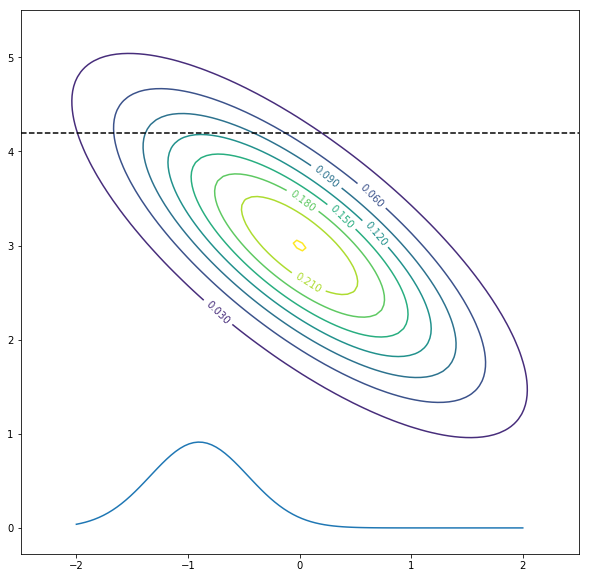

In [486]:
# plot contour lines
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
plot_2D(ax1, miu_2D, cov_2D, nsigma=2.5)
    
# plot line
if True:
    y0 = 4.2
    plt.axhline(y0, color='k', linestyle='--')

# plot conditional distribution
if True:
    n1D = condition_2D(miu_2D, cov_2D, x=None, y=y0)
    x = np.linspace(-2, 2, 100)
    plt.plot(x, n1D.pdf(x))

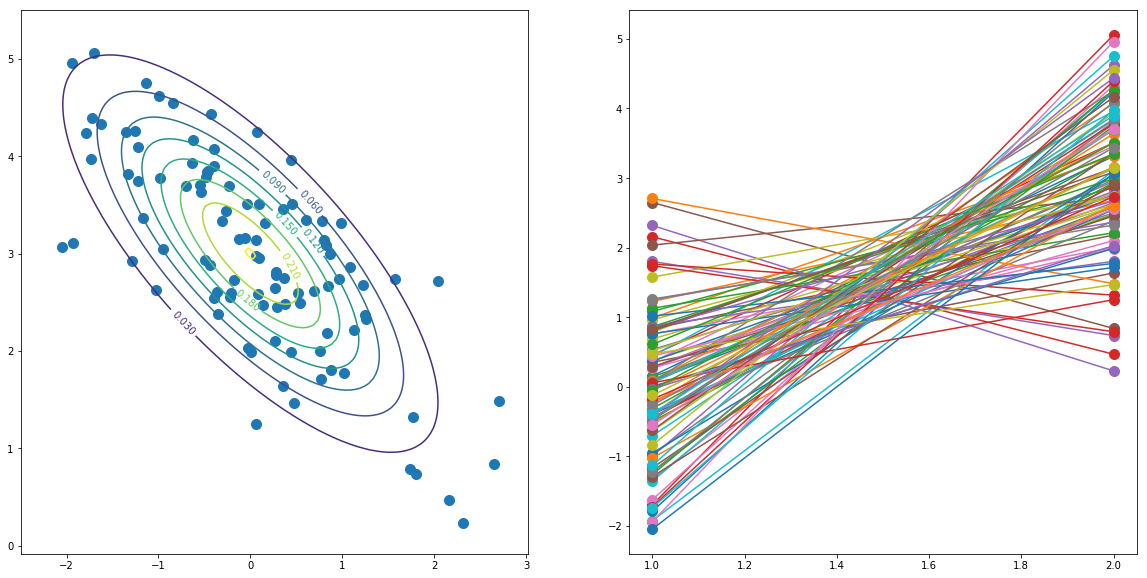

In [487]:
# sample from 2D distribution

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# plot contour lines
plot_2D(ax1, miu_2D, cov_2D, nsigma=2.5)

# generate 2D samples
npoints = 100
samples = dist_2D.rvs(npoints)
if npoints == 1:
    samples = [samples]
xsamples = [s[0] for s in samples]
ysamples = [s[1] for s in samples]

# plot 2D samples
if True:
    ax1.scatter(xsamples, ysamples, s=100)
    for n in range(npoints):
        ax2.plot([1, 2], [xsamples[n], ysamples[n]], marker='o', markersize=10)

In [495]:
# create N dimensional normal distributions

def kernel(x, y, L):
    d = (x - y)/float(L)
    return np.exp(-(d))

def create_Ndim_normal(Ndim, L):
    miu = np.zeros(Ndim)
    cov = np.diag(np.ones(Ndim))
    for i in range(0, Ndim):
        for j in range(0, Ndim):
            if i != j:
                cov[i][j] = cov[j][i] = kernel(i, j, L)
    return stats.multivariate_normal(miu, cov)

In [499]:
Ndim     = 10
Nsamples = 3
Lambda   = 10.25

samples_ND = create_Ndim_normal(Ndim, Lambda).rvs(Nsamples)
if Nsamples == 1:
    samples_ND = [samples_ND]

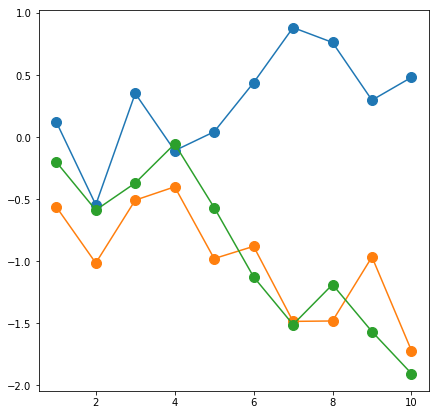

In [500]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)

for n in range(Nsamples):
    ax1.plot(np.arange(1, Ndim+1), samples_ND[n], marker='o', markersize=10)

In [512]:
def conditional(x_new, x, y, params):

    B = exponential_cov(x_new, x, params)
    C = exponential_cov(x, x, params)
    A = exponential_cov(x_new, x_new, params)
    mu = np.linalg.inv(C).dot(B.T).T.dot(y)
    sigma = A - B.dot(np.linalg.inv(C).dot(B.T))
    return(mu.squeeze(), sigma.squeeze())

x = [1, 2, 4]
exponential_cov(x, x, [1, 1])


array([[ 1.        ,  0.60653066,  0.011109  ],
       [ 0.60653066,  1.        ,  0.13533528],
       [ 0.011109  ,  0.13533528,  1.        ]])

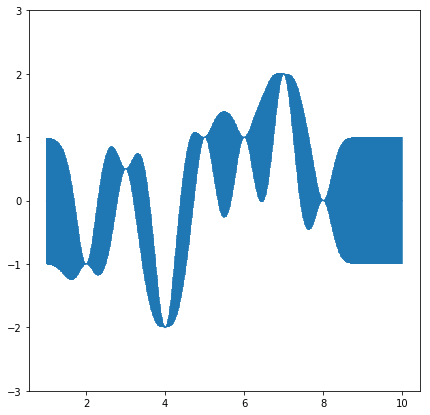

In [651]:
def kernel(x, y, params):
    return params[0] * np.exp( -0.5 * params[1] * np.subtract.outer(x, y)**2)

# -----
params = [1, 10]
Nsamples = 1

#Xs = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Xs = np.arange(1, 10, step=0.01)
Ys = {2:-1, 3:0.5, 4:-2, 5:1, 6:1, 7:2, 8:0}
# -----

Xs_cond = np.array(list(Ys.keys()))
Ys_cond = np.array(list(Ys.values()))
Xs_free = np.setdiff1d(Xs, Xs_cond)

A = kernel(Xs_cond, Xs_cond, params)
B = kernel(Xs_free, Xs_free, params)
C = kernel(Xs_cond, Xs_free, params).T

cov_cond = B - C.dot(np.linalg.inv(A).dot(C.T))
miu_cond = C.dot(np.linalg.inv(A).dot(Ys_cond))
    
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)    
    
# draw samples
if False:
    samples = []
    for n in range(Nsamples):
        vals = stats.multivariate_normal(miu_cond, cov_cond).rvs(1)
        for (idx, val) in Ys.items():
            vals = np.insert(vals, idx-1, val)
        samples.append(vals)

    for n in range(Nsamples):
        ax1.plot(Xs, samples[n], marker='o', markersize=1)
    
# show stdev
else:
    ax1.set_ylim([-3, 3])
    ax1.errorbar(Xs, miu_cond, np.diag(cov_cond), capsize=0)

    